In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
## Leitura da base de dados housing (pública)
housing_dataset = pd.read_csv('housing.csv')
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
## Estrutura de dados
housing_dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
# eliminando dados nulos
housing_dataset = housing_dataset.dropna()

In [5]:
# colunas categóricas para conjuntos de colunas binárias
housing_dataset = pd.get_dummies(housing_dataset, columns= ['ocean_proximity'])
housing_dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

<Axes: >

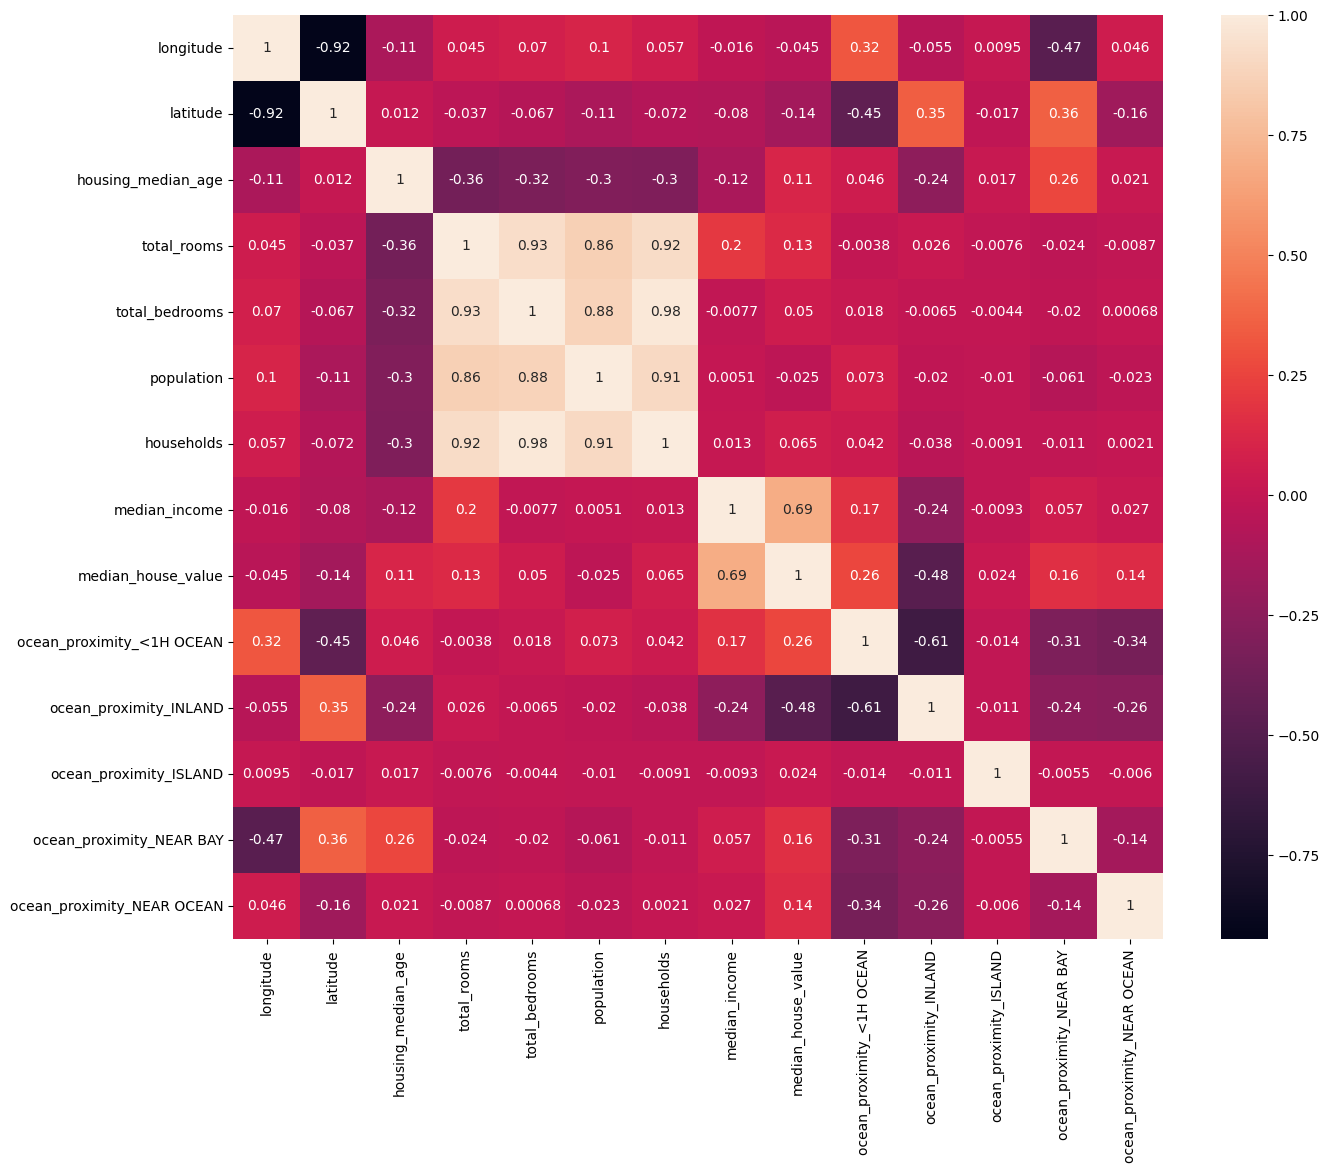

In [6]:
# Correlação entre as variáveis
housing_dataset_correlation = housing_dataset.corr()
housing_dataset_correlation
plt.figure(figsize=(15,12))
sns.heatmap(housing_dataset_correlation, annot = True)

In [7]:
# Preparação das variáveis dependentes (Y) e variáveis preditoras (X)
X = housing_dataset.drop('median_house_value', axis = 1) # Features
Y = housing_dataset['median_house_value'] # Target

In [8]:
# Separação das bases de treino e predição
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=45)

In [9]:
# Aplicação do modelo na base de treino
linear_regressor = LinearRegression().fit(x_train, y_train)
print("Training score : ", linear_regressor.score(x_train, y_train))

Training score :  0.6480944739155927


In [10]:
# Aplicação do modelo na base de predição
y_pred = linear_regressor.predict(x_test)
print("testing score : ", r2_score(y_test, y_pred))

testing score :  0.6368167545989893


In [11]:
# tuning do modelo
linear_regressor_parameter = {'fit_intercept': [True, False]}
linear_regressor_grid_search = GridSearchCV(LinearRegression(), linear_regressor_parameter, cv
= 2)
linear_regressor_grid_search.fit(x_train, y_train)
print('The best score',linear_regressor_grid_search.best_score_)
print('The best parameters',linear_regressor_grid_search.best_params_)

The best score 0.6469500815505516
The best parameters {'fit_intercept': True}


<Axes: xlabel='median_house_value', ylabel='previsao'>

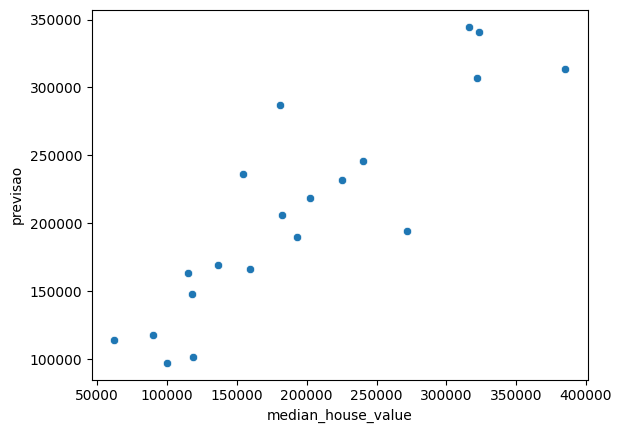

In [13]:
# Aplicação em uma amostra de 20 linhas
import random
inputNumbers =range(0,len(housing_dataset['longitude']))
indices = random.sample(inputNumbers, 20)
teste = housing_dataset[housing_dataset.index.isin(indices)].copy()
teste
X_teste = teste.drop('median_house_value', axis = 1)
y_pred = linear_regressor.predict(X_teste)
y_pred

## criar atributos de previsão
teste['previsao'] = y_pred
teste
sns.scatterplot(data=teste, x="median_house_value", y="previsao")

In [14]:
## Coeficientes da Regressão Linear
linear_regressor.intercept_
linear_regressor.coef_

array([-2.75922701e+04, -2.60858768e+04,  1.07513510e+03, -6.11705111e+00,
        9.96010820e+01, -4.36827919e+01,  6.53233737e+01,  3.94080582e+04,
       -2.23703603e+04, -6.10341933e+04,  1.28986357e+05, -2.77937548e+04,
       -1.77880482e+04])